# COMP 432 - BIXI

In [61]:
import numpy as np
import pandas as pd
from zipfile import ZipFile
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Removing scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Load BIXI data

In [2]:
zf = ZipFile('./data/bixi/biximontrealrentals2019-33ea73.zip')
bixi_2019_04 = pd.read_csv(zf.open('OD_2019-04.csv'), parse_dates=['start_date', 'end_date'])
bixi_2019_05 = pd.read_csv(zf.open('OD_2019-05.csv'), parse_dates=['start_date', 'end_date'])
bixi_2019_06 = pd.read_csv(zf.open('OD_2019-06.csv'), parse_dates=['start_date', 'end_date'])
bixi_2019_07 = pd.read_csv(zf.open('OD_2019-07.csv'), parse_dates=['start_date', 'end_date'])
bixi_2019_08 = pd.read_csv(zf.open('OD_2019-08.csv'), parse_dates=['start_date', 'end_date'])
bixi_2019_09 = pd.read_csv(zf.open('OD_2019-09.csv'), parse_dates=['start_date', 'end_date'])
bixi_2019_10 = pd.read_csv(zf.open('OD_2019-10.csv'), parse_dates=['start_date', 'end_date'])
bixi_2019_stations = pd.read_csv(zf.open('Stations_2019.csv'), dtype={'name': 'str'})

/Users/simon/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [469]:
bixi_2019_04.head(10)

,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member
0,2019-04-14 07:55:22,6001,2019-04-14 08:07:16,6132,713,1
1,2019-04-14 07:59:31,6411,2019-04-14 08:09:18,6411,587,1
2,2019-04-14 07:59:55,6097,2019-04-14 08:12:11,6036,736,1
3,2019-04-14 07:59:57,6310,2019-04-14 08:27:58,6345,1680,1
4,2019-04-14 08:00:37,7029,2019-04-14 08:14:12,6250,814,0
5,2019-04-14 08:01:27,6234,2019-04-14 08:08:02,6215,395,1
6,2019-04-14 08:01:42,7133,2019-04-14 08:11:31,7129,588,0
7,2019-04-14 08:01:52,6306,2019-04-14 08:10:11,6221,499,1
8,2019-04-14 08:02:29,6233,2019-04-14 08:04:41,6234,132,0
9,2019-04-14 08:02:46,6350,2019-04-14 08:09:04,7034,378,1


In [4]:
bixi_2019_stations.head()

,Code,name,latitude,longitude
0,10002,Métro Charlevoix (Centre / Charlevoix),45.478,-73.570
1,4000,Jeanne-d'Arc / Ontario,45.550,-73.542
2,4001,Graham / Brookfield,45.520,-73.630
3,4002,Graham / Wicksteed,45.517,-73.640
4,5002,St-Charles / Montarville,45.534,-73.515


# Load weather data

In [5]:
# Note: Use Date/Time column instead of Time column
weather_2019_04 = pd.read_csv('./data/weather/2019/en_climate_hourly_QC_7025251_04-2019_P1H.csv', parse_dates=['Date/Time'], dtype={'Station Name': 'str', 'Weather': 'str'})
weather_2019_05 = pd.read_csv('./data/weather/2019/en_climate_hourly_QC_7025251_05-2019_P1H.csv', parse_dates=['Date/Time'], dtype={'Station Name': 'str', 'Weather': 'str'})
weather_2019_06 = pd.read_csv('./data/weather/2019/en_climate_hourly_QC_7025251_06-2019_P1H.csv', parse_dates=['Date/Time'], dtype={'Station Name': 'str', 'Weather': 'str'})
weather_2019_07 = pd.read_csv('./data/weather/2019/en_climate_hourly_QC_7025251_07-2019_P1H.csv', parse_dates=['Date/Time'], dtype={'Station Name': 'str', 'Weather': 'str'})
weather_2019_08 = pd.read_csv('./data/weather/2019/en_climate_hourly_QC_7025251_08-2019_P1H.csv', parse_dates=['Date/Time'], dtype={'Station Name': 'str', 'Weather': 'str'})
weather_2019_09 = pd.read_csv('./data/weather/2019/en_climate_hourly_QC_7025251_09-2019_P1H.csv', parse_dates=['Date/Time'], dtype={'Station Name': 'str', 'Weather': 'str'})
weather_2019_10 = pd.read_csv('./data/weather/2019/en_climate_hourly_QC_7025251_10-2019_P1H.csv', parse_dates=['Date/Time'], dtype={'Station Name': 'str', 'Weather': 'str'})

In [6]:
weather_2019_04.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-73.740,45.470,MONTREAL INTL A,7025251,2019-04-01 00:00:00,2019,4,1,00:00,-1.500,...,nan,24.100,nan,100.750,nan,nan,nan,-7.000,nan,Snow
1,-73.740,45.470,MONTREAL INTL A,7025251,2019-04-01 01:00:00,2019,4,1,01:00,-1.700,...,nan,24.100,nan,100.790,nan,nan,nan,-9.000,nan,Cloudy
2,-73.740,45.470,MONTREAL INTL A,7025251,2019-04-01 02:00:00,2019,4,1,02:00,-2.900,...,nan,24.100,nan,100.860,nan,nan,nan,-9.000,nan,NaN
3,-73.740,45.470,MONTREAL INTL A,7025251,2019-04-01 03:00:00,2019,4,1,03:00,-3.900,...,nan,24.100,nan,100.920,nan,nan,nan,-10.000,nan,NaN
4,-73.740,45.470,MONTREAL INTL A,7025251,2019-04-01 04:00:00,2019,4,1,04:00,-4.800,...,nan,24.100,nan,101.030,nan,nan,nan,-11.000,nan,Clear


# Merging all data together

## BIXI data

Merging all 2019 bixi trips together

In [7]:
bixi_2019_all = pd.concat([bixi_2019_04, bixi_2019_05, bixi_2019_06, bixi_2019_07, bixi_2019_08, bixi_2019_09, bixi_2019_10])
bixi_2019_all.sample(5)

,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member
493580,2019-10-24 20:11:28,6314,2019-10-24 20:15:32,6154,244,1
1096311,2019-07-31 19:46:51,6018,2019-07-31 19:51:02,6123,251,1
433611,2019-06-14 22:47:10,6116,2019-06-14 22:54:41,6729,450,1
136554,2019-05-07 01:37:15,6912,2019-05-07 01:41:42,6247,267,1
375907,2019-07-11 07:45:36,6195,2019-07-11 07:53:01,6191,444,1


Append station data to all Bixi Trips

***May take a while to run**

In [8]:
bixi_2019_all_with_stations = bixi_2019_all.merge(bixi_2019_stations, left_index=True, left_on='start_station_code', right_on='Code').drop('Code', 1).rename({'name': 'start_name', 'latitude': 'start_latitude', 'longitude': 'start_longitude'}, axis=1).merge(bixi_2019_stations, left_index=True, left_on='end_station_code', right_on='Code').drop('Code', 1).rename({'name': 'end_name', 'latitude': 'end_latitude', 'longitude': 'end_longitude'}, axis=1)
bixi_2019_all_with_stations.sample(2)

,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member,start_name,start_latitude,start_longitude,end_name,end_latitude,end_longitude
132,2019-05-03 08:07:15,6164,2019-05-03 08:11:01,6136,225,1,de Lanaudière / Laurier,45.533,-73.584,Métro Laurier (Rivard / Laurier),45.528,-73.589
240,2019-10-25 16:09:38,6168,2019-10-25 16:15:23,6250,344,1,Marmier / St-Denis,45.531,-73.598,Marché Jean-Talon (Henri-Julien / Jean-Talon),45.537,-73.615
145,2019-04-16 17:48:07,6154,2019-04-16 17:52:31,6150,264,1,Marquette / du Mont-Royal,45.532,-73.575,Messier / du Mont-Royal,45.537,-73.571
262,2019-08-25 13:39:37,6182,2019-08-25 14:03:48,6273,1450,0,de Bullion / du Mont-Royal,45.522,-73.585,Cartier / Bélanger,45.547,-73.603
436,2019-10-29 07:58:19,6042,2019-10-29 08:04:26,6749,366,1,de la Gauchetière / Robert-Bourassa,45.501,-73.565,St-Jacques / St-Laurent,45.506,-73.556


## Weather data

Merging weather data

In [403]:
weather_2019_all = pd.concat([weather_2019_04, weather_2019_05, weather_2019_06, weather_2019_07, weather_2019_08, weather_2019_09, weather_2019_10])
weather_2019_all.sample(5)

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
74,-73.740,45.470,MONTREAL INTL A,7025251,2019-10-04 02:00:00,2019,10,4,02:00,5.700,...,nan,8.100,nan,100.970,nan,nan,nan,nan,nan,"Drizzle,Fog"
457,-73.740,45.470,MONTREAL INTL A,7025251,2019-08-20 01:00:00,2019,8,20,01:00,16.600,...,nan,24.100,nan,101.170,nan,nan,nan,nan,nan,Clear
511,-73.740,45.470,MONTREAL INTL A,7025251,2019-05-22 07:00:00,2019,5,22,07:00,11.500,...,nan,48.300,nan,102.050,nan,nan,nan,nan,nan,Mainly Clear
480,-73.740,45.470,MONTREAL INTL A,7025251,2019-09-21 00:00:00,2019,9,21,00:00,18.000,...,nan,24.100,nan,101.660,nan,nan,nan,nan,nan,NaN
60,-73.740,45.470,MONTREAL INTL A,7025251,2019-06-03 12:00:00,2019,6,3,12:00,10.500,...,nan,48.300,nan,100.290,nan,nan,nan,nan,nan,NaN


# Extract features from weather data

Checking for any null values in weather data to know which features to avoid

We will still keep *Weather* even with ~3000 nulls since this will answer our question

In [404]:
weather_2019_all.isnull().sum()

Longitude (x)             0
Latitude (y)              0
Station Name              0
Climate ID                0
Date/Time                 0
Year                      0
Month                     0
Day                       0
Time                      0
Temp (°C)                 1
Temp Flag              5136
Dew Point Temp (°C)       1
Dew Point Temp Flag    5136
Rel Hum (%)               1
Rel Hum Flag           5136
Wind Dir (10s deg)        5
Wind Dir Flag          5136
Wind Spd (km/h)           1
Wind Spd Flag          5136
Visibility (km)           1
Visibility Flag        5136
Stn Press (kPa)           1
Stn Press Flag         5136
Hmdx                   3988
Hmdx Flag              5136
Wind Chill             5024
Wind Chill Flag        5136
Weather                2991
dtype: int64

In [405]:
weather_2019_all = weather_2019_all[[
    'Date/Time', 
    'Year',
    'Month',
    'Day',
    'Temp (°C)', 
    'Dew Point Temp (°C)',
    'Rel Hum (%)',
    'Wind Dir (10s deg)',
    'Wind Spd (km/h)',
    'Visibility (km)', 
    'Stn Press (kPa)', 
    'Weather']]

weather_2019_all['Hour'] = weather_2019_all['Date/Time'].dt.hour
weather_2019_all['Minute'] = weather_2019_all['Date/Time'].dt.minute
weather_2019_all['Second'] = weather_2019_all['Date/Time'].dt.second
weather_2019_all['Day_of_year'] = weather_2019_all['Date/Time'].dt.dayofyear

weather_2019_all.sample(5)

,Date/Time,Year,Month,Day,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Hour,Minute,Second,Day_of_year
413,2019-09-18 05:00:00,2019,9,18,8.800,7.800,94.000,2.000,14.000,24.100,102.220,NaN,5,0,0,261
452,2019-07-19 20:00:00,2019,7,19,28.200,23.100,73.000,23.000,24.000,24.100,100.090,NaN,20,0,0,200
210,2019-09-09 18:00:00,2019,9,9,16.400,6.500,52.000,27.000,4.000,48.300,102.190,NaN,18,0,0,252
36,2019-07-02 12:00:00,2019,7,2,27.300,16.300,51.000,25.000,21.000,48.300,100.260,NaN,12,0,0,183
165,2019-10-07 21:00:00,2019,10,7,14.200,11.100,82.000,24.000,18.000,24.100,101.360,NaN,21,0,0,280


## Checking possible values for weather

Weather data is a string that may contain more than 1 weather condition. We will one-hot encode it.

In [406]:
weather_2019_all['Weather'].value_counts()

Mostly Cloudy                              520
Clear                                      334
Cloudy                                     326
Mainly Clear                               317
Rain                                       310
Rain Showers                                87
Rain,Fog                                    83
Drizzle,Fog                                 32
Fog                                         29
Drizzle                                     25
Snow                                        17
Moderate Rain,Fog                           16
Thunderstorms,Rain Showers                  10
Moderate Rain                                6
Freezing Rain                                4
Freezing Drizzle,Fog                         3
Snow Showers                                 3
Freezing Rain,Fog                            3
Snow,Fog                                     2
Moderate Rain Showers                        2
Rain,Snow                                    2
Thunderstorms

### Hot encode

In [407]:
hot_encode = weather_2019_all['Weather'].str.get_dummies(',')
hot_encode.head(5)

,Clear,Cloudy,Drizzle,Fog,Freezing Drizzle,Freezing Rain,Heavy Rain Showers,Mainly Clear,Moderate Rain,Moderate Rain Showers,Moderate Snow,Mostly Cloudy,Rain,Rain Showers,Snow,Snow Grains,Snow Showers,Thunderstorms
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Visually verify that it matches with weather

In [408]:
weather_2019_all[['Weather']].head(5)

,Weather
0,Snow
1,Cloudy
2,NaN
3,NaN
4,Clear


### Merge hot encode with weather data

In [409]:
weather_2019_all = pd.concat([weather_2019_all, hot_encode], axis=1, sort=False).drop('Weather', axis=1)
weather_2019_all

,Date/Time,Year,Month,Day,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),...,Moderate Rain,Moderate Rain Showers,Moderate Snow,Mostly Cloudy,Rain,Rain Showers,Snow,Snow Grains,Snow Showers,Thunderstorms
0,2019-04-01 00:00:00,2019,4,1,-1.500,-4.000,83.000,30.000,19.000,24.100,...,0,0,0,0,0,0,1,0,0,0
1,2019-04-01 01:00:00,2019,4,1,-1.700,-6.800,68.000,29.000,30.000,24.100,...,0,0,0,0,0,0,0,0,0,0
2,2019-04-01 02:00:00,2019,4,1,-2.900,-7.700,70.000,29.000,21.000,24.100,...,0,0,0,0,0,0,0,0,0,0
3,2019-04-01 03:00:00,2019,4,1,-3.900,-9.300,66.000,29.000,21.000,24.100,...,0,0,0,0,0,0,0,0,0,0
4,2019-04-01 04:00:00,2019,4,1,-4.800,-10.600,64.000,28.000,21.000,24.100,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,2019-10-31 19:00:00,2019,10,31,11.900,11.400,97.000,2.000,25.000,4.000,...,1,0,0,0,0,0,0,0,0,0
740,2019-10-31 20:00:00,2019,10,31,10.800,10.200,96.000,3.000,25.000,8.100,...,0,0,0,0,1,0,0,0,0,0
741,2019-10-31 21:00:00,2019,10,31,9.900,9.200,95.000,1.000,37.000,12.900,...,1,0,0,0,0,0,0,0,0,0
742,2019-10-31 22:00:00,2019,10,31,9.000,8.000,93.000,4.000,33.000,24.100,...,0,0,0,0,1,0,0,0,0,0


## Dealing with null values

For the missing values, we will use replace them with the last value that was observed

In [410]:
weather_2019_all.isnull().sum()

Date/Time                0
Year                     0
Month                    0
Day                      0
Temp (°C)                1
Dew Point Temp (°C)      1
Rel Hum (%)              1
Wind Dir (10s deg)       5
Wind Spd (km/h)          1
Visibility (km)          1
Stn Press (kPa)          1
Hour                     0
Minute                   0
Second                   0
Day_of_year              0
Clear                    0
Cloudy                   0
Drizzle                  0
Fog                      0
Freezing Drizzle         0
Freezing Rain            0
Heavy Rain Showers       0
Mainly Clear             0
Moderate Rain            0
Moderate Rain Showers    0
Moderate Snow            0
Mostly Cloudy            0
Rain                     0
Rain Showers             0
Snow                     0
Snow Grains              0
Snow Showers             0
Thunderstorms            0
dtype: int64

In [411]:
weather_2019_all = weather_2019_all.fillna(method='ffill') 
weather_2019_all.isnull().sum()

Date/Time                0
Year                     0
Month                    0
Day                      0
Temp (°C)                0
Dew Point Temp (°C)      0
Rel Hum (%)              0
Wind Dir (10s deg)       0
Wind Spd (km/h)          0
Visibility (km)          0
Stn Press (kPa)          0
Hour                     0
Minute                   0
Second                   0
Day_of_year              0
Clear                    0
Cloudy                   0
Drizzle                  0
Fog                      0
Freezing Drizzle         0
Freezing Rain            0
Heavy Rain Showers       0
Mainly Clear             0
Moderate Rain            0
Moderate Rain Showers    0
Moderate Snow            0
Mostly Cloudy            0
Rain                     0
Rain Showers             0
Snow                     0
Snow Grains              0
Snow Showers             0
Thunderstorms            0
dtype: int64

# Summing the number of trips per hour for every station

## Group data by stations

In [412]:
temp = bixi_2019_all_with_stations
station_group = temp.groupby('start_station_code')

## Count the number of trips by merging the hours together for each station

In [413]:
hour_trips_dict = {}

with tqdm(total=len(station_group)) as pbar:
    for station_code, df in station_group:
        # Randomly appending "start_year" since all columns return the same number. Renaming it after.
        hour_trips = pd.DataFrame(df.set_index('start_date').resample('H').count()['start_name']).rename(columns={'start_name': 'hour_trip_count'})
        hour_trips_dict[station_code] = hour_trips
        pbar.update(1)

100%|██████████| 619/619 [00:08<00:00, 74.85it/s] 


Check for station ID 4000

In [414]:
hour_trips_dict[4000].head(20)

,hour_trip_count
start_date,
2019-04-14 09:00:00,1
2019-04-14 10:00:00,4
2019-04-14 11:00:00,0
2019-04-14 12:00:00,1
2019-04-14 13:00:00,2
2019-04-14 14:00:00,3
2019-04-14 15:00:00,3
2019-04-14 16:00:00,5
2019-04-14 17:00:00,0


# Merge weather data to trip data

In [415]:
for i in hour_trips_dict:
    df = hour_trips_dict[i]
    df = df.merge(weather_2019_all, left_on='start_date', right_on='Date/Time')
    hour_trips_dict[i] = df

In [416]:
hour_trips_dict[4000]

,hour_trip_count,Date/Time,Year,Month,Day,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),...,Moderate Rain,Moderate Rain Showers,Moderate Snow,Mostly Cloudy,Rain,Rain Showers,Snow,Snow Grains,Snow Showers,Thunderstorms
0,1,2019-04-14 09:00:00,2019,4,14,7.000,-3.700,46.000,27.000,12.000,...,0,0,0,0,0,0,0,0,0,0
1,4,2019-04-14 10:00:00,2019,4,14,7.400,-4.400,43.000,25.000,7.000,...,0,0,0,0,0,0,0,0,0,0
2,0,2019-04-14 11:00:00,2019,4,14,7.600,-4.300,43.000,28.000,8.000,...,0,0,0,0,0,0,0,0,0,0
3,1,2019-04-14 12:00:00,2019,4,14,8.300,-2.500,46.000,19.000,12.000,...,0,0,0,0,0,0,0,0,0,0
4,2,2019-04-14 13:00:00,2019,4,14,7.800,-4.300,42.000,22.000,4.000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4805,0,2019-10-31 14:00:00,2019,10,31,13.300,12.700,96.000,2.000,8.000,...,0,0,0,0,1,0,0,0,0,0
4806,1,2019-10-31 15:00:00,2019,10,31,15.500,14.900,97.000,13.000,13.000,...,0,0,0,0,1,0,0,0,0,0
4807,0,2019-10-31 16:00:00,2019,10,31,15.600,15.000,96.000,12.000,8.000,...,1,0,0,0,0,0,0,0,0,0
4808,1,2019-10-31 17:00:00,2019,10,31,15.900,15.200,96.000,9.000,7.000,...,0,0,0,0,1,0,0,0,0,0


# Preparing data for training

In [421]:
hour_trips_dict[4000].dtypes

hour_trip_count                   int64
Date/Time                datetime64[ns]
Year                              int64
Month                             int64
Day                               int64
Temp (°C)                       float64
Dew Point Temp (°C)             float64
Rel Hum (%)                     float64
Wind Dir (10s deg)              float64
Wind Spd (km/h)                 float64
Visibility (km)                 float64
Stn Press (kPa)                 float64
Hour                              int64
Minute                            int64
Second                            int64
Day_of_year                       int64
Clear                             int64
Cloudy                            int64
Drizzle                           int64
Fog                               int64
Freezing Drizzle                  int64
Freezing Rain                     int64
Heavy Rain Showers                int64
Mainly Clear                      int64
Moderate Rain                     int64


# Checking correlation

In [418]:
correlations = [hour_trips_dict[i].corr() for i in hour_trips_dict]

In [419]:
corr_avg = correlations[7]

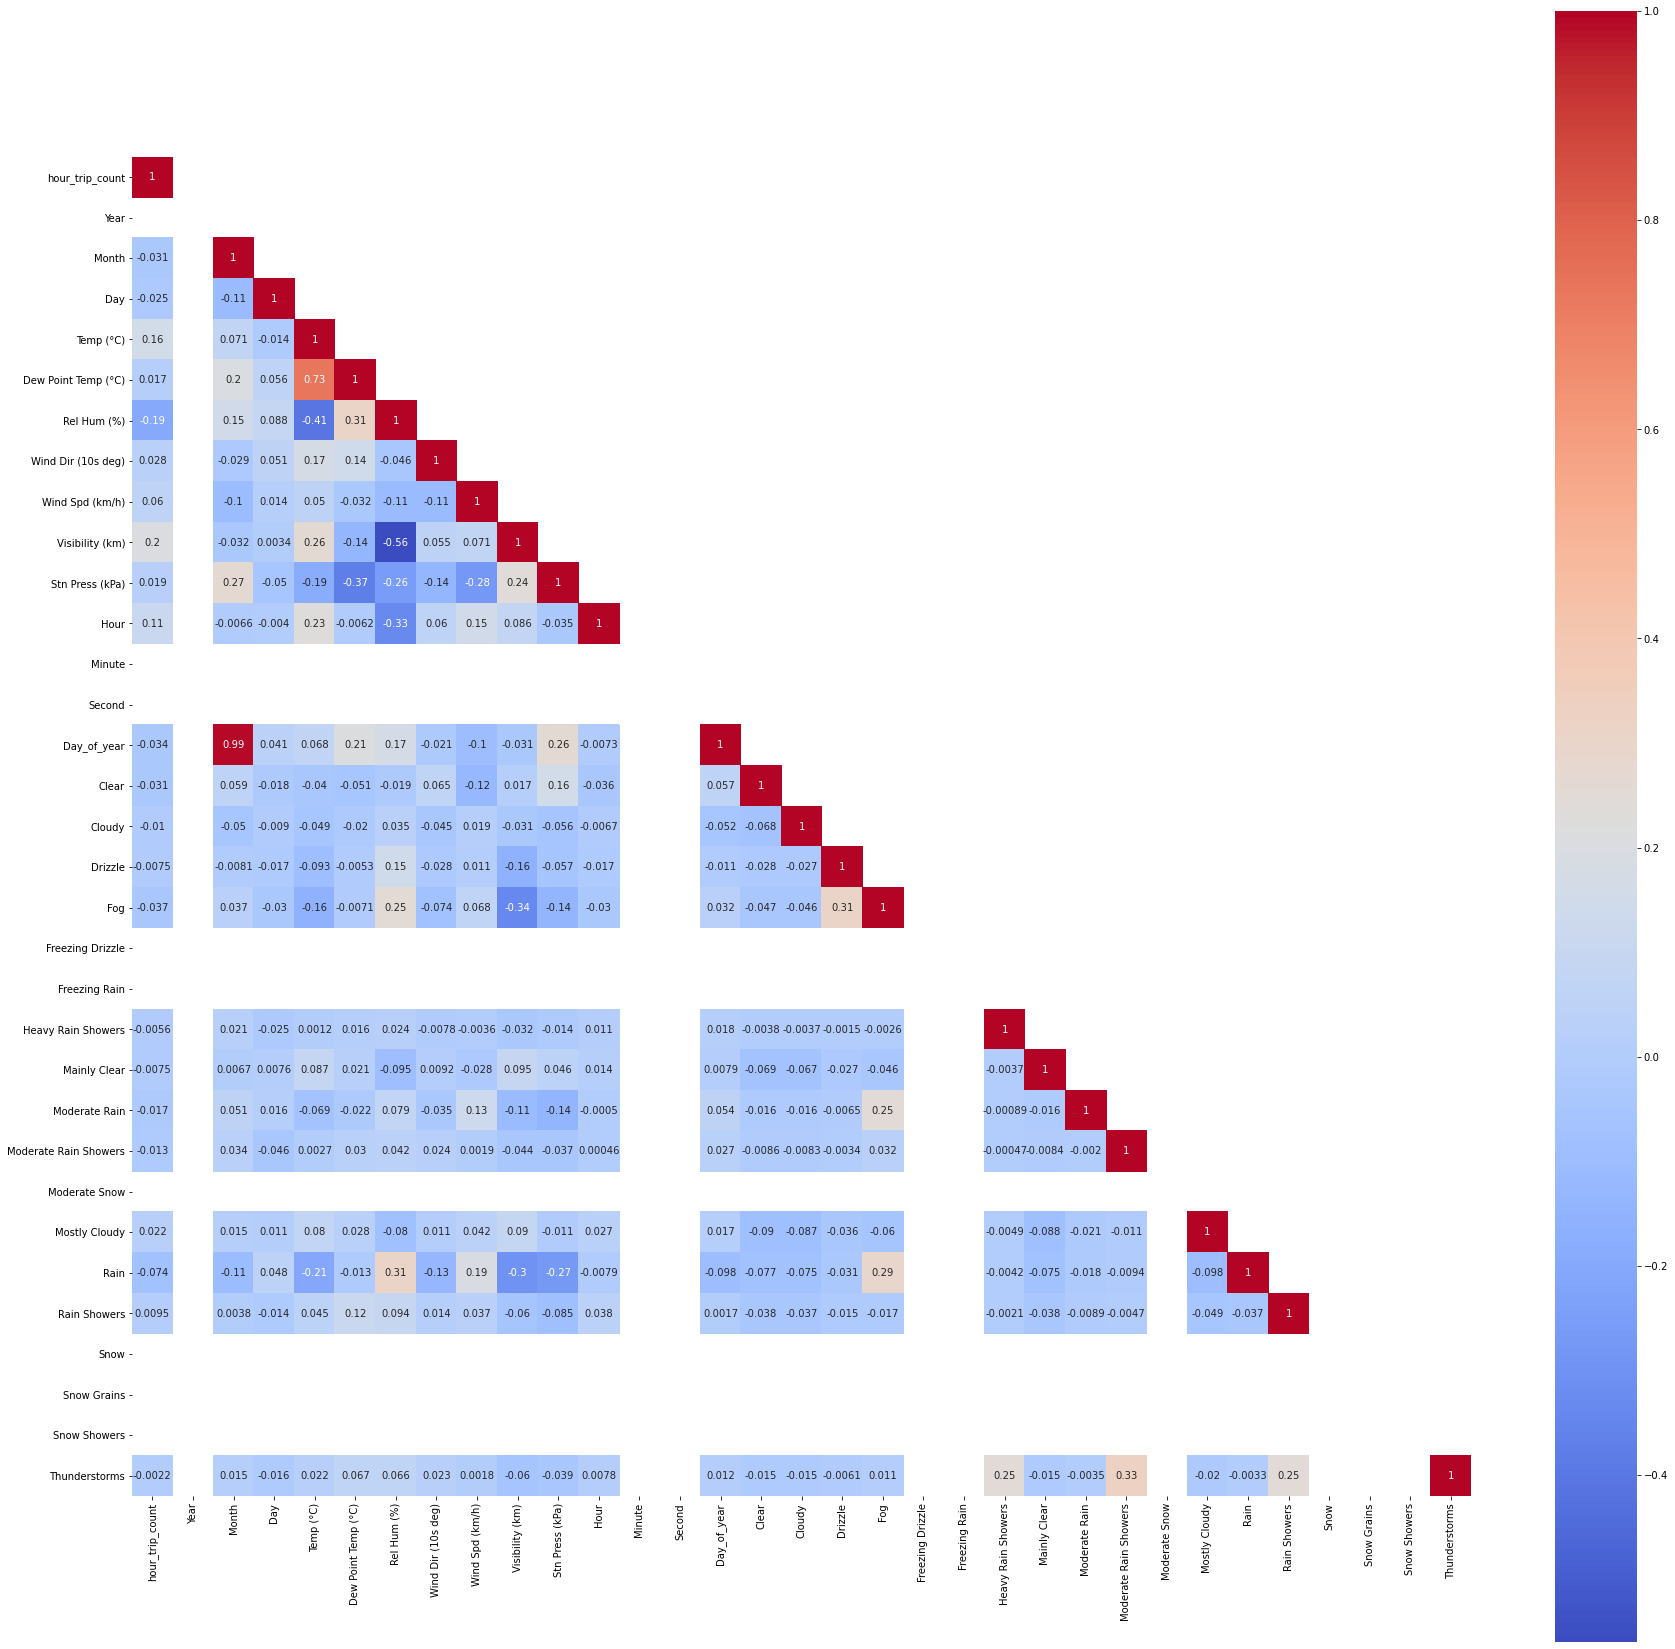

In [420]:
mask = np.array(corr_avg)
mask[np.tril_indices_from(mask)] = False # Set the lower triangle values to false. Used for masking the top half

plt.figure(figsize=(30,30))
sns.heatmap(corr_avg, mask=mask, square=True, annot=True, cmap="coolwarm")
plt.show()

# Splitting training X and y data

In [422]:
hour_trips_dict[4000].columns

Index(['hour_trip_count', 'Date/Time', 'Year', 'Month', 'Day', 'Temp (°C)',
       'Dew Point Temp (°C)', 'Rel Hum (%)', 'Wind Dir (10s deg)',
       'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)', 'Hour',
       'Minute', 'Second', 'Day_of_year', 'Clear', 'Cloudy', 'Drizzle', 'Fog',
       'Freezing Drizzle', 'Freezing Rain', 'Heavy Rain Showers',
       'Mainly Clear', 'Moderate Rain', 'Moderate Rain Showers',
       'Moderate Snow', 'Mostly Cloudy', 'Rain', 'Rain Showers', 'Snow',
       'Snow Grains', 'Snow Showers', 'Thunderstorms'],
      dtype='object')

In [429]:
train_group_data = {}

with tqdm(total=len(train_group)) as pbar:
    for station_code in hour_trips_dict:
        df = hour_trips_dict[station_code]
        X_train = df[['Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)', 'Wind Dir (10s deg)',
                      'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)', 'Hour', 'Day_of_year',
                      'Clear', 'Cloudy', 'Drizzle', 'Fog', 'Freezing Drizzle', 'Freezing Rain', 
                      'Heavy Rain Showers', 'Mainly Clear', 'Moderate Rain', 'Moderate Rain Showers',
                      'Moderate Snow', 'Mostly Cloudy', 'Rain', 'Rain Showers', 'Snow', 'Snow Grains', 
                      'Snow Showers', 'Thunderstorms']]
        y_train = df[['hour_trip_count']]

        train_group_data[station_code] = {
            "X_train": X_train,
            "y_train": y_train
        }
        pbar.update(1)

100%|██████████| 619/619 [00:00<00:00, 659.17it/s]


Data can be accessed using:
train_group_data[4000]['y_train']

In [437]:
train_group_data[4000]['X_train'].columns

Index(['Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)', 'Wind Dir (10s deg)',
       'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)', 'Hour',
       'Day_of_year', 'Clear', 'Cloudy', 'Drizzle', 'Fog', 'Freezing Drizzle',
       'Freezing Rain', 'Heavy Rain Showers', 'Mainly Clear', 'Moderate Rain',
       'Moderate Rain Showers', 'Moderate Snow', 'Mostly Cloudy', 'Rain',
       'Rain Showers', 'Snow', 'Snow Grains', 'Snow Showers', 'Thunderstorms'],
      dtype='object')

In [447]:
train_group_data[4000]['X_train']

,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hour,Day_of_year,Clear,...,Moderate Rain,Moderate Rain Showers,Moderate Snow,Mostly Cloudy,Rain,Rain Showers,Snow,Snow Grains,Snow Showers,Thunderstorms
0,7.000,-3.700,46.000,27.000,12.000,48.300,101.300,9,104,0,...,0,0,0,0,0,0,0,0,0,0
1,7.400,-4.400,43.000,25.000,7.000,48.300,101.230,10,104,0,...,0,0,0,0,0,0,0,0,0,0
2,7.600,-4.300,43.000,28.000,8.000,48.300,101.160,11,104,0,...,0,0,0,0,0,0,0,0,0,0
3,8.300,-2.500,46.000,19.000,12.000,48.300,101.070,12,104,0,...,0,0,0,0,0,0,0,0,0,0
4,7.800,-4.300,42.000,22.000,4.000,48.300,100.950,13,104,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4805,13.300,12.700,96.000,2.000,8.000,3.600,99.770,14,304,0,...,0,0,0,0,1,0,0,0,0,0
4806,15.500,14.900,97.000,13.000,13.000,6.400,99.660,15,304,0,...,0,0,0,0,1,0,0,0,0,0
4807,15.600,15.000,96.000,12.000,8.000,4.800,99.520,16,304,0,...,1,0,0,0,0,0,0,0,0,0
4808,15.900,15.200,96.000,9.000,7.000,6.400,99.350,17,304,0,...,0,0,0,0,1,0,0,0,0,0


In [470]:
train_group_data[4000]['y_train']

,hour_trip_count
0,1
1,4
2,0
3,1
4,2
...,...
4805,0
4806,1
4807,0
4808,1


# Training Models

In [448]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Linear Regression

In [441]:
models_lr = {}
models_lr_r2score = {}

with tqdm(total=len(train_group_data)) as pbar:
    for key in train_group_data:
        # Training data
        X_train = train_group_data[key]['X_train']
        y_train = train_group_data[key]['y_train']
        
        # Model
        model = LinearRegression().fit(X_train, y_train)
        models_lr[key] = model
        
        # Training error
        models_lr_r2score[key] = model.score(X_train, y_train)
        
        pbar.update(1)

100%|██████████| 619/619 [00:03<00:00, 164.65it/s]


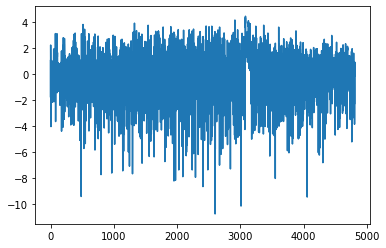

In [446]:
pred = models_lr[4000].predict(train_group_data[4000]['X_train'])
correct = train_group_data[4000]['y_train']
diff = np.subtract(pred, correct)
x = np.arange(len(pred))
plt.plot(x, diff)

In [440]:
df_models_lr_r2score = pd.DataFrame.from_dict(models_lr_r2score, orient='index')
df_models_lr_r2score.describe()

,0
count,619.000
mean,0.188
std,0.084
min,0.013
25%,0.125
50%,0.177
75%,0.250
max,0.447


In [471]:
df_models_lr_r2score

,0
4000,0.300
4001,0.081
4002,0.154
5002,0.051
5003,0.051
...,...
7150,0.056
7151,0.034
7152,0.055
7153,0.051


From above, we see that the score is quite low for Linear Regression (11%)

# SGD Regression

In [435]:
models_sgdr = {}
models_sgdr_r2score = {}

with tqdm(total=len(train_group_data)) as pbar:
    for key in train_group_data:
        # Training data
        X_train = train_group_data[key]['X_train']
        y_train = train_group_data[key]['y_train'].to_numpy().flatten()
        
        #Normalize data
        flow = make_pipeline(MinMaxScaler(), SGDRegressor())
        
        # Model
        model = flow.fit(X_train, y_train)
        models_sgdr[key] = model
        
        # Training error
        models_sgdr_r2score[key] = model.score(X_train, y_train)
        
        pbar.update(1)

100%|██████████| 619/619 [00:09<00:00, 68.02it/s]


In [436]:
df_models_sgdr_r2score = pd.DataFrame.from_dict(models_sgdr_r2score, orient='index')
df_models_sgdr_r2score.describe()

,0
count,619.000
mean,0.184
std,0.085
min,0.007
25%,0.120
50%,0.172
75%,0.247
max,0.436


# MLP Regressor

In [41]:
# models_mlpr = {}
# models_mlpr_r2score = {}

# with tqdm(total=len(train_group_data)) as pbar:
#     for key in train_group_data:
#         # Training data
#         X_train = train_group_data[key]['X_train']
#         y_train = train_group_data[key]['y_train'].to_numpy().flatten()

#         # Model
#         model = MLPRegressor(max_iter=1000).fit(X_train, y_train)
#         models_mlpr[key] = model
        
#         # Training Error
#         models_mlpr_r2score[key] = model.score(X_train, y_train)
        
#         pbar.update(1)

In [42]:
df_models_mlpr_r2score = pd.DataFrame.from_dict(models_mlpr_r2score, orient='index')
df_models_mlpr_r2score.describe()

NameError: name 'models_mlpr_r2score' is not defined

# Decision Tree Regressor

In [474]:
models_dtr = {}
models_dtr_r2score = {}

with tqdm(total=len(train_group_data)) as pbar:
    for key in train_group_data:
        # Training data
        X_train = train_group_data[key]['X_train']
        y_train = train_group_data[key]['y_train']
        
        # Model
        model = DecisionTreeRegressor(max_depth=10).fit(X_train, y_train)
        models_dtr[key] = model
        
        # Training error
        models_dtr_r2score[key] = model.score(X_train, y_train)
        
        pbar.update(1)

100%|██████████| 619/619 [00:12<00:00, 51.06it/s]


In [475]:
df_models_dtr_r2score = pd.DataFrame.from_dict(models_dtr_r2score, orient='index')
df_models_dtr_r2score.describe()

,0
count,619.000
mean,0.617
std,0.092
min,0.327
25%,0.557
50%,0.625
75%,0.675
max,1.000
